In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Loading master data and having a peep at the the content
df = pd.read_csv('twitter_archive_master.csv')
df.head(2)

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,source_y,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853.0,39467.0,False,False,0.0,0.0,en
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514.0,33819.0,False,False,0.0,0.0,en


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2356 non-null   int64  
 1   timestamp                      2356 non-null   object 
 2   source_x                       2356 non-null   object 
 3   text                           2356 non-null   object 
 4   expanded_urls                  2297 non-null   object 
 5   rating_numerator               2340 non-null   float64
 6   rating_denominator             2340 non-null   float64
 7   name                           2356 non-null   object 
 8   dog_stage                      380 non-null    object 
 9   jpg_url                        2075 non-null   object 
 10  img_num                        2075 non-null   float64
 11  p1                             2075 non-null   object 
 12  p1_conf                        2075 non-null   f

tweet_favorites and tweet_retweet

In [4]:
def scatter_plotter(xaxis,yaxis,titl):
    df.plot(kind='scatter', x=xaxis,y=yaxis, title=titl);

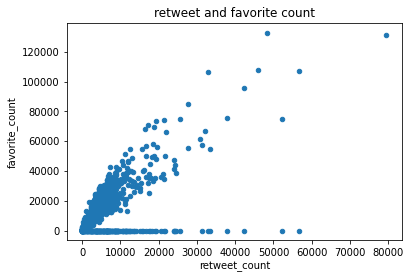

In [5]:
scatter_plotter('retweet_count','favorite_count', 'retweet and favorite count')

To show what time particular time of the day the audience interact with the posts

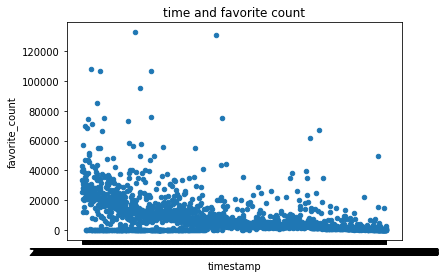

In [6]:
scatter_plotter('timestamp','favorite_count', 'time and favorite count')

There is no significant relationship between the time of the day and people's interaction with post

To see the popular dog stage in the data set

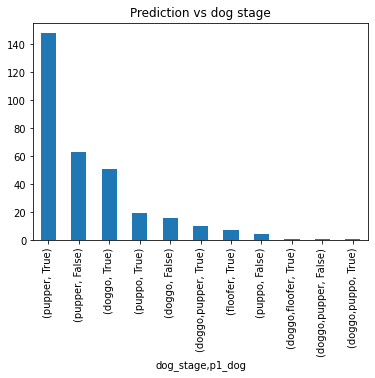

In [7]:
df[['dog_stage','p1_dog']].value_counts().plot(kind='bar', title='Prediction vs dog stage'); 

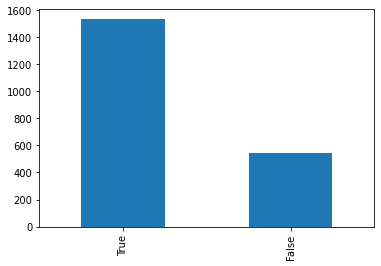

In [8]:
df['p1_dog'].value_counts().plot(kind='bar');

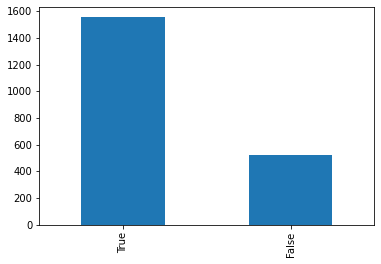

In [9]:
df['p2_dog'].value_counts().plot(kind='bar');

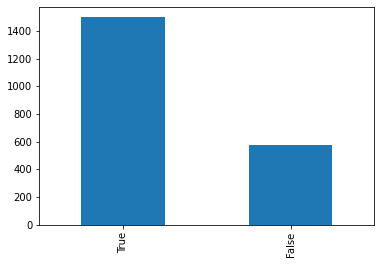

In [10]:
df['p3_dog'].value_counts().plot(kind='bar');

In [11]:
df[df['rating_numerator'] <= 14]['rating_numerator'].describe()

count    2328.000000
mean       10.704467
std         2.173865
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

More than 75% of the data has more than 12/10 as rating
The page start with small rating than they adopt the system of rating numerator more than the denominator

Famous Breeds

Text(0, 0.5, 'dog_stage')

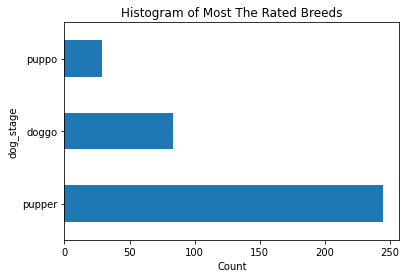

In [12]:

# Without specify the lengh we don't get good result so we will subset our data on the most owned
df_by_breed = df.groupby('dog_stage').filter(lambda x: len(x) >= 20)

df_by_breed['dog_stage'].value_counts().plot(kind = 'barh')
plt.title('Histogram of Most The Rated Breeds')
plt.xlabel('Count')
plt.ylabel('dog_stage')

Text(0.5, 1.0, 'Famous Breeds')

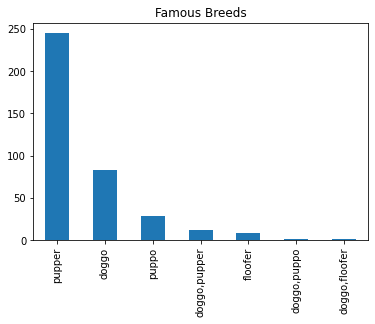

In [13]:
# Plot the data partitioned by dog gender
df[df['dog_stage'].notnull()]['dog_stage'].value_counts().plot(kind = 'bar')
plt.title('Famous Breeds')

In [14]:
# Which gender had high ratings
df[['dog_stage', 'rating_numerator']][df.dog_stage.notnull()].groupby('dog_stage').mean()

,rating_numerator
dog_stage,
doggo,11.879518
"doggo,floofer",11.000000
"doggo,pupper",11.250000
"doggo,puppo",13.000000
floofer,11.888889
pupper,10.853061
puppo,12.103448


(-1.2901133432538514,
 1.2391692968945773,
 -1.2106800536036224,
 1.2094861185400525)

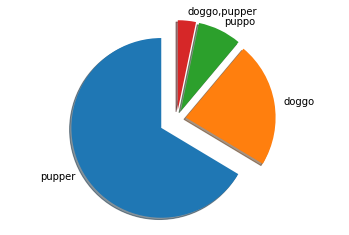

In [15]:
# Plot the data partitioned by dog stages

dog_stage_count = list(df[df['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = df[df['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')

pupper have the highest number of dog stages

# Insights:
1. Majority of the dogs rated are in the 'pupper stage', followed weakly by the 'doggo' and 'puppo'


2. retweet and favorite count are not significantly influenced by the time of post


3. Most of the "p1" predictions for the stage "pupper" came out to be true


4. Other preductions viz. p2_dog, p3_dog both have similar effectiveness as the p1_dog from the distribution of True and False

# Limitations
- Data Accuracy: Dataset used was collated over a long period of time. 
- Data Representativeness: There were instance of missing data some of which were dropped.